<a href="https://colab.research.google.com/github/hopeletty/KerasIntro/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train /255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


Build an ML model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])
predictions = model(x_train[:1]).numpy()
predictions

array([[ 4.9413753e-01,  7.8421009e-01,  1.3259798e-03, -1.6070215e-01,
        -6.2951446e-02, -7.9086000e-01,  3.4183928e-01,  1.3987883e+00,
         2.3167956e-01,  7.4799061e-01]], dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.10304578, 0.1377232 , 0.06295132, 0.0535349 , 0.05903228,
        0.02850774, 0.08848872, 0.25463322, 0.07925856, 0.1328242 ]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

3.5575795

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Train and evaluate the model

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2958 - accuracy: 0.9138
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1419 - accuracy: 0.9584
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1068 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0892 - accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0741 - accuracy: 0.9765


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0711 - accuracy: 0.9780 - 601ms/epoch - 2ms/step


[0.07113578170537949, 0.9779999852180481]

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.1339910e-06, 6.9958754e-09, 3.8653939e-06, 3.7963610e-04,
        6.0919653e-10, 2.0567897e-07, 2.7056208e-13, 9.9953043e-01,
        1.0531833e-06, 8.3670297e-05],
       [4.9612430e-09, 5.2199273e-05, 9.9994576e-01, 1.6461273e-06,
        1.1606092e-13, 1.2279551e-07, 1.4596493e-07, 5.9844545e-14,
        1.4781797e-07, 1.7502478e-13],
       [2.1092251e-06, 9.9735332e-01, 2.6575246e-04, 2.5237056e-05,
        9.9701843e-05, 2.5776788e-05, 1.2731913e-04, 1.1282109e-03,
        9.6645590e-04, 6.2252357e-06],
       [9.9966681e-01, 2.8388271e-11, 7.0813367e-06, 6.8702640e-08,
        5.9790050e-06, 1.8754138e-06, 2.7807051e-04, 2.4760516e-06,
        6.6902275e-09, 3.7657130e-05],
       [4.6033792e-06, 1.1722394e-11, 5.0771629e-05, 9.0043621e-08,
        9.9632299e-01, 2.4842407e-07, 7.3159999e-06, 2.8909195e-05,
        7.8691170e-07, 3.5843654e-03]], dtype=float32)>

#Basic classification: Classify images of clothing



In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dresss', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape


(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

#Preprocess the data

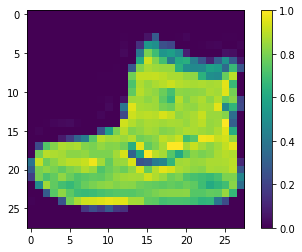

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

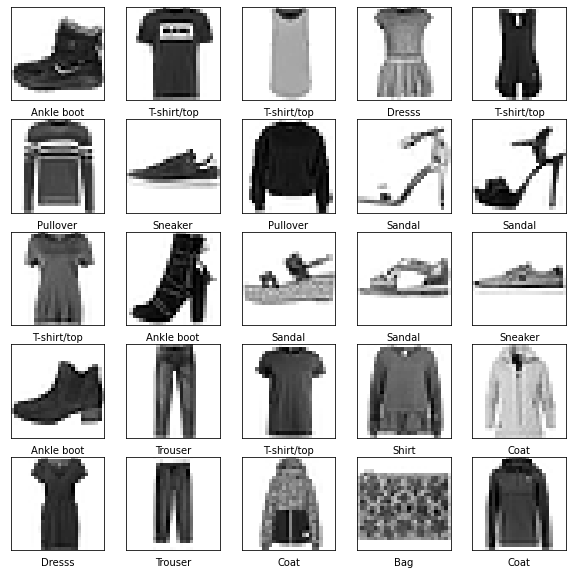

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0     #scale the values to a range of 0 to 1 before feeding them to the neural network model
plt.figure( figsize=(10, 10))
for i in range (25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()




In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)






Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0839 - accuracy: 0.6657
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6404 - accuracy: 0.7685
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5676 - accuracy: 0.7969
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5257 - accuracy: 0.8139
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4971 - accuracy: 0.8248
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4759 - accuracy: 0.8326
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4605 - accuracy: 0.8389
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4485 - accuracy: 0.8414
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4387 - accuracy: 0.8457
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.430

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) #evaluating accuracy
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4582 - accuracy: 0.8343 - 467ms/epoch - 1ms/step

Test accuracy: 0.8342999815940857


In [ ]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [23]:
predictions[0]

array([6.57439102e-07, 1.47983625e-08, 3.73951275e-06, 2.95076825e-06,
       4.45071146e-06, 1.32892057e-01, 2.11731385e-05, 3.71366411e-01,
       4.43412689e-03, 4.91274446e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

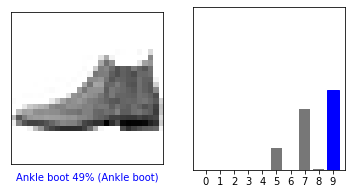

In [27]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0                 #verify predictions
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

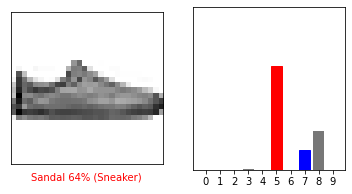

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

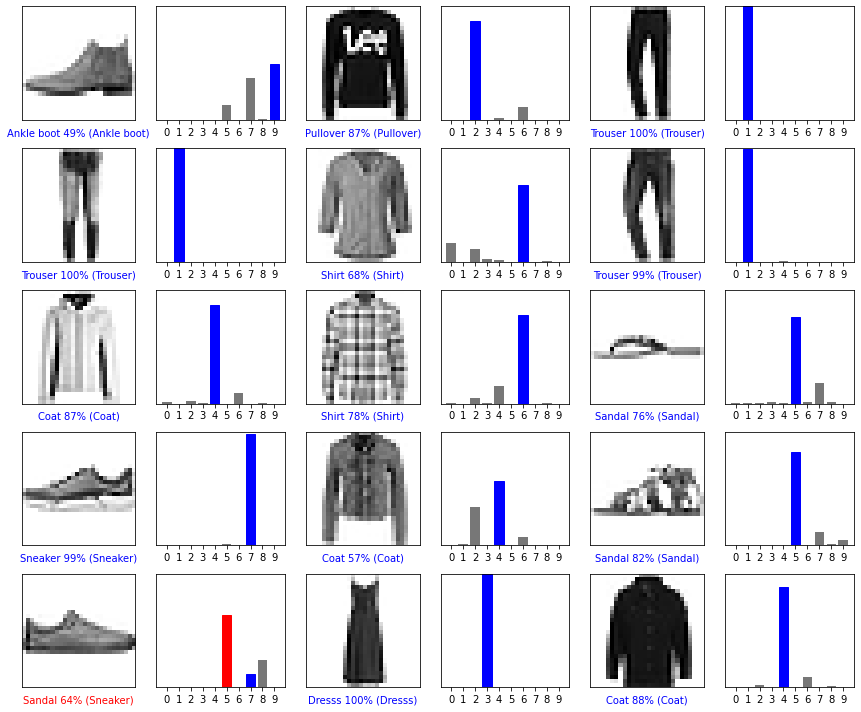

In [33]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [42]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [43]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [44]:
predictions_single = probability_model.predict(img) #predict the correct label for the image

print(predictions_single)

1/1 [==============================] - 0s 29ms/step
[[5.27922646e-04 1.27710555e-05 8.67843211e-01 1.13931230e-04
  2.03228574e-02 6.41123765e-10 1.11073032e-01 1.36485917e-14
  1.06318599e-04 1.90231702e-11]]


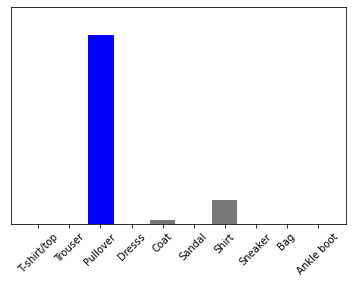

In [45]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [46]:
np.argmax(predictions_single[0])

2